In [2]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


In [163]:
#importing Necessary modules
import quandl
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

# TASK 2

In [158]:
#Fetching data to through API
quandl = quandl.get("BSE/BOM500325", authtoken="bwnFc2yx21NhsHDdzUAL")

In [161]:
#Converting data to CSV
quandl.to_csv('Reliance.csv')

In [164]:
#To check that file is saved in CSV
pd.read_csv('Reliance.csv')

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,1991-01-02,115.00,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1,1991-01-03,107.50,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
2,1991-01-07,105.00,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
3,1991-01-09,105.00,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
4,1991-01-11,102.50,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,2020-11-14,2013.00,2016.25,1996.00,2001.80,2005.75,100085.0,8102.0,2.007451e+08,39617.0,39.58,20.25,-11.20
7230,2020-11-17,2084.00,2084.00,1985.00,1992.90,2012.31,643296.0,33218.0,1.294508e+09,142610.0,22.17,99.00,-91.10
7231,2020-11-18,1997.45,2006.65,1961.00,1987.20,1980.18,427982.0,29066.0,8.474796e+08,78708.0,18.39,45.65,-10.25
7232,2020-11-19,1986.40,2010.00,1968.00,1972.65,1988.17,802733.0,59306.0,1.595967e+09,255097.0,31.78,42.00,-13.75


# TASK 1

## TASK 1a
Included is the file containing a time-series data from the stock market. For every stock mentioned, we have data for several days at a 60Mins frequency containing the Open, High, Low and Close Values.
Convert/Resample 60Mins data into 1day candles data

In [171]:
#Fetching Time Specific Data
quandl.ApiConfig.api_key = 'bwnFc2yx21NhsHDdzUAL'
df_grib = quandl.get('BSE/BOM500325', start_date='2020-11-12', end_date='2020-11-13')

In [172]:
df_grib.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-11-12,1985.0,2008.35,1965.0,1979.85,1988.00,711464.0,38178.0,1.414393e+09,283431.0,39.84,43.35,-5.15
2020-11-13,1990.0,2036.65,1981.0,1996.10,1985.53,1825121.0,31252.0,3.623827e+09,1276056.0,69.92,55.65,6.10


#### Preprocessing

In [173]:
df_grib.dtypes

Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object

In [174]:
#Removing unecessary columns
del_col=[  'WAP', 'No. of Shares', 'No. of Trades', 'Total Turnover', 'Deliverable Quantity','% Deli. Qty to Traded Qty','Spread H-L','Spread C-O']
df_grib= df_grib.drop(del_col,1)
df_grib.head(3)

,Open,High,Low,Close
Date,,,,
2020-11-12,1985.0,2008.35,1965.0,1979.85
2020-11-13,1990.0,2036.65,1981.0,1996.10


In [175]:
df_grib.reset_index(inplace = True)

In [176]:
df_grib.head()

,Date,Open,High,Low,Close
0,2020-11-12,1985.0,2008.35,1965.0,1979.85
1,2020-11-13,1990.0,2036.65,1981.0,1996.10


In [146]:
df_grib.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [177]:
#converting date format to numerical value 
#df_new.reset_index(inplace = True)
df_grib['Date'] = df_grib['Date'].map(mdates.date2num)

In [178]:
df_grib.dtypes

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [179]:
df_grib.head()

,Date,Open,High,Low,Close
0,737741.0,1985.0,2008.35,1965.0,1979.85
1,737742.0,1990.0,2036.65,1981.0,1996.10


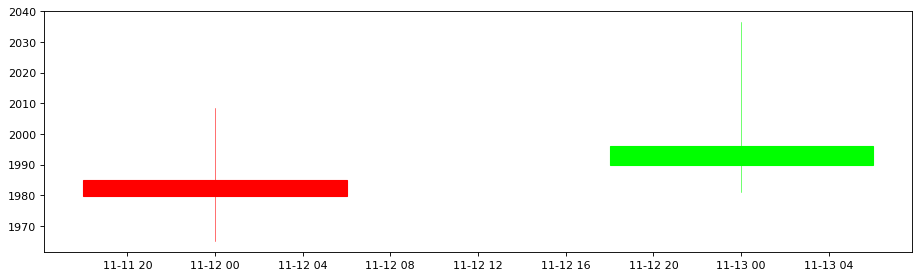

In [180]:
#Visualization
plt.figure(figsize=(14,4),dpi=80)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('Reliance Industries',color = 'white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')

ax.tick_params(axis = 'x',color = 'white')
ax.tick_params(axis = 'y',color = 'white')

ax = plt.subplot()
ax.xaxis_date()

candlestick_ohlc(ax, df_grib.values,width = 0.5,colorup = '#00ff00')
plt.show()

## Task 1b

Calculate 13 period rolling/moving average of High and 5 rolling/period moving average of close for every Symbol.
If Moving Average of close crosses Moving Average of High from below mark that as a "flag" (1)
Identify all the stocks for last 5 days which had a flag in it.
Attempt to do this with pandas, using functions (if possible).